<a href="https://colab.research.google.com/github/RodRBF/An-lises-Financeiras-com-Python/blob/main/An%C3%A1lise_de_Portf%C3%B3lio_Yahoo_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Teoria Moderna do Portfólio (Markowitz) + Indice de Sharpe**

---
**O objetivo** do código abaixo é selecionar determinado número de ações para construir a fronteira de eficiencia para portfólios, além de comparar seus respectivos riscos de acordo com o indice de sharpe

In [ ]:

import pandas as pd
from pandas_datareader import data
import yfinance as yf
from pylab import mpl, plt
import scipy.stats as scs
import numpy as np
import math
import scipy.optimize as sco

In [ ]:
# Baixar os dados do Yahoo
Values = ['VALE3.SA','TOTS3.SA','CSNA3.SA','ITUB3.SA','CSAN3.SA','CCRO3.SA']
df = yf.download(Values, start='2016-01-01', end='2021-01-01')['Adj Close']
df

[*********************100%%**********************]  6 of 6 completed


Ticker,CCRO3.SA,CSAN3.SA,CSNA3.SA,ITUB3.SA,TOTS3.SA,VALE3.SA
Date,,,,,,
2016-01-04,9.284756,4.469543,2.394012,9.359368,9.156914,7.919020
2016-01-05,9.521651,4.491891,2.276172,9.557898,9.112160,7.812937
2016-01-06,9.391742,4.406225,2.096311,9.501174,9.338919,7.238822
2016-01-07,8.826249,4.357805,2.046694,9.387730,9.094257,6.808236
2016-01-08,8.788041,4.357805,2.121119,9.533589,9.115140,6.577344
...,...,...,...,...,...,...
2020-12-22,12.459508,16.516642,22.630913,23.950912,26.635979,63.420673
2020-12-23,12.686045,16.296743,23.041569,24.315639,26.780430,63.727055
2020-12-28,12.704922,16.835495,23.175962,24.689064,27.088581,63.690578


In [ ]:
# Troar títulos das colunas

prices = df
rotulo = ['CCR','COSAN','CSN','ITAU','TOTVS','VALE']
prices.columns= rotulo
prices.head()

,CCR,COSAN,CSN,ITAU,TOTVS,VALE
Date,,,,,,
2016-01-04,9.284756,4.469543,2.394012,9.359368,9.156914,7.919020
2016-01-05,9.521651,4.491891,2.276172,9.557898,9.112160,7.812937
2016-01-06,9.391742,4.406225,2.096311,9.501174,9.338919,7.238822
2016-01-07,8.826249,4.357805,2.046694,9.387730,9.094257,6.808236
2016-01-08,8.788041,4.357805,2.121119,9.533589,9.115140,6.577344


In [ ]:
# Exportar para Excell

prices.to_excel('precos_yahoo.xlsx', encoding='utf-8', index=True)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [ ]:
# Dar "estilo" para os gráficos
# Para checar estilos -> https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

plt.style.use('seaborn')
mpl.rcParams['font.family']= 'serif'

<ipython-input-132-65e062a9e1d2>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='Date'>

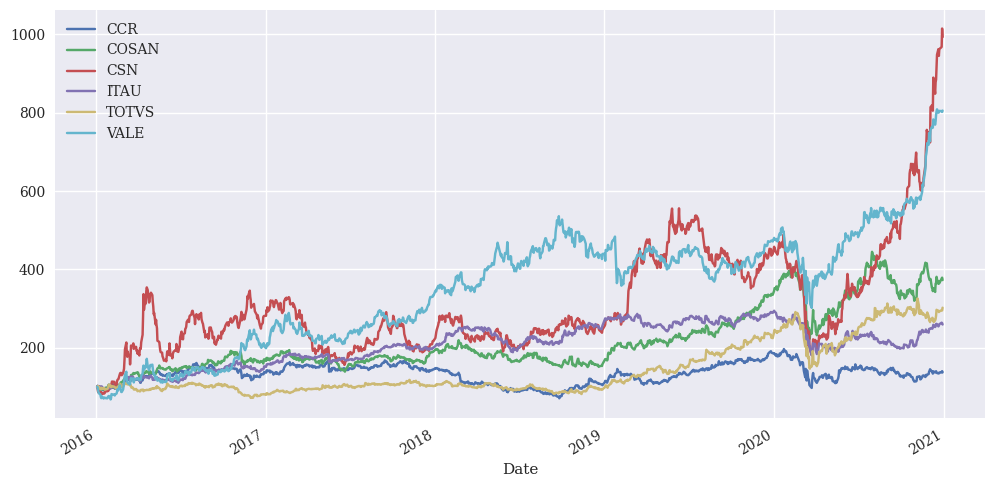

In [ ]:
## Plotar Gráficos (usar base 100 por conta da disparidade entre valores)

prices_aj = prices/prices.iloc[0]*100
prices_aj
prices_aj.plot(figsize=(12,6))

<Axes: xlabel='Date'>

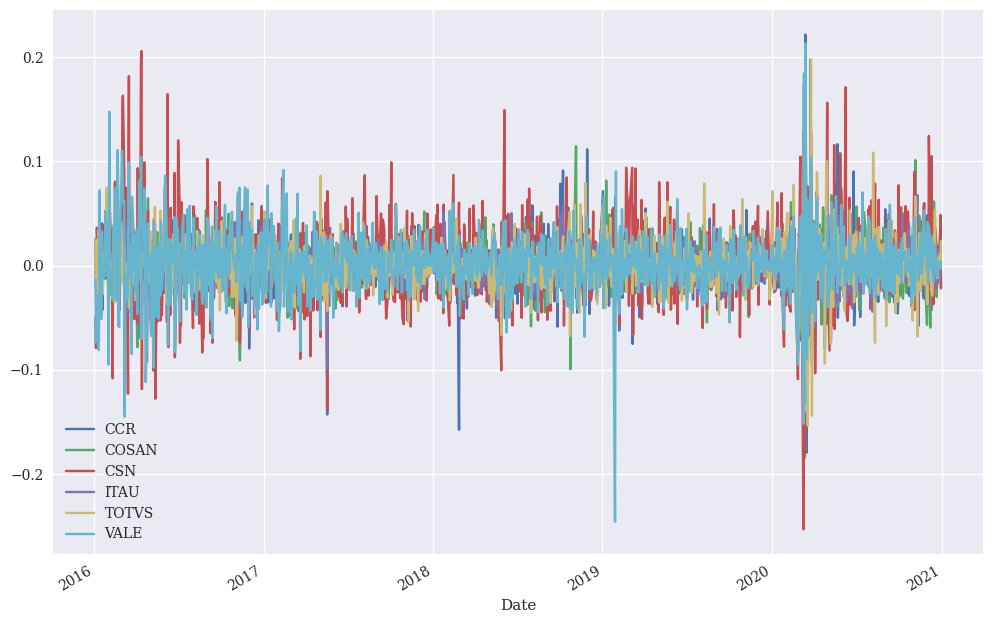

In [ ]:
# Estimar retornos diários

retornos = prices.pct_change()
retornos = retornos.dropna()
retornos

# Plotar Gráfico

retornos.plot(figsize=(12,8))


array([[<Axes: title={'center': 'CCR'}>,
        <Axes: title={'center': 'COSAN'}>],
       [<Axes: title={'center': 'CSN'}>,
        <Axes: title={'center': 'ITAU'}>],
       [<Axes: title={'center': 'TOTVS'}>,
        <Axes: title={'center': 'VALE'}>]], dtype=object)

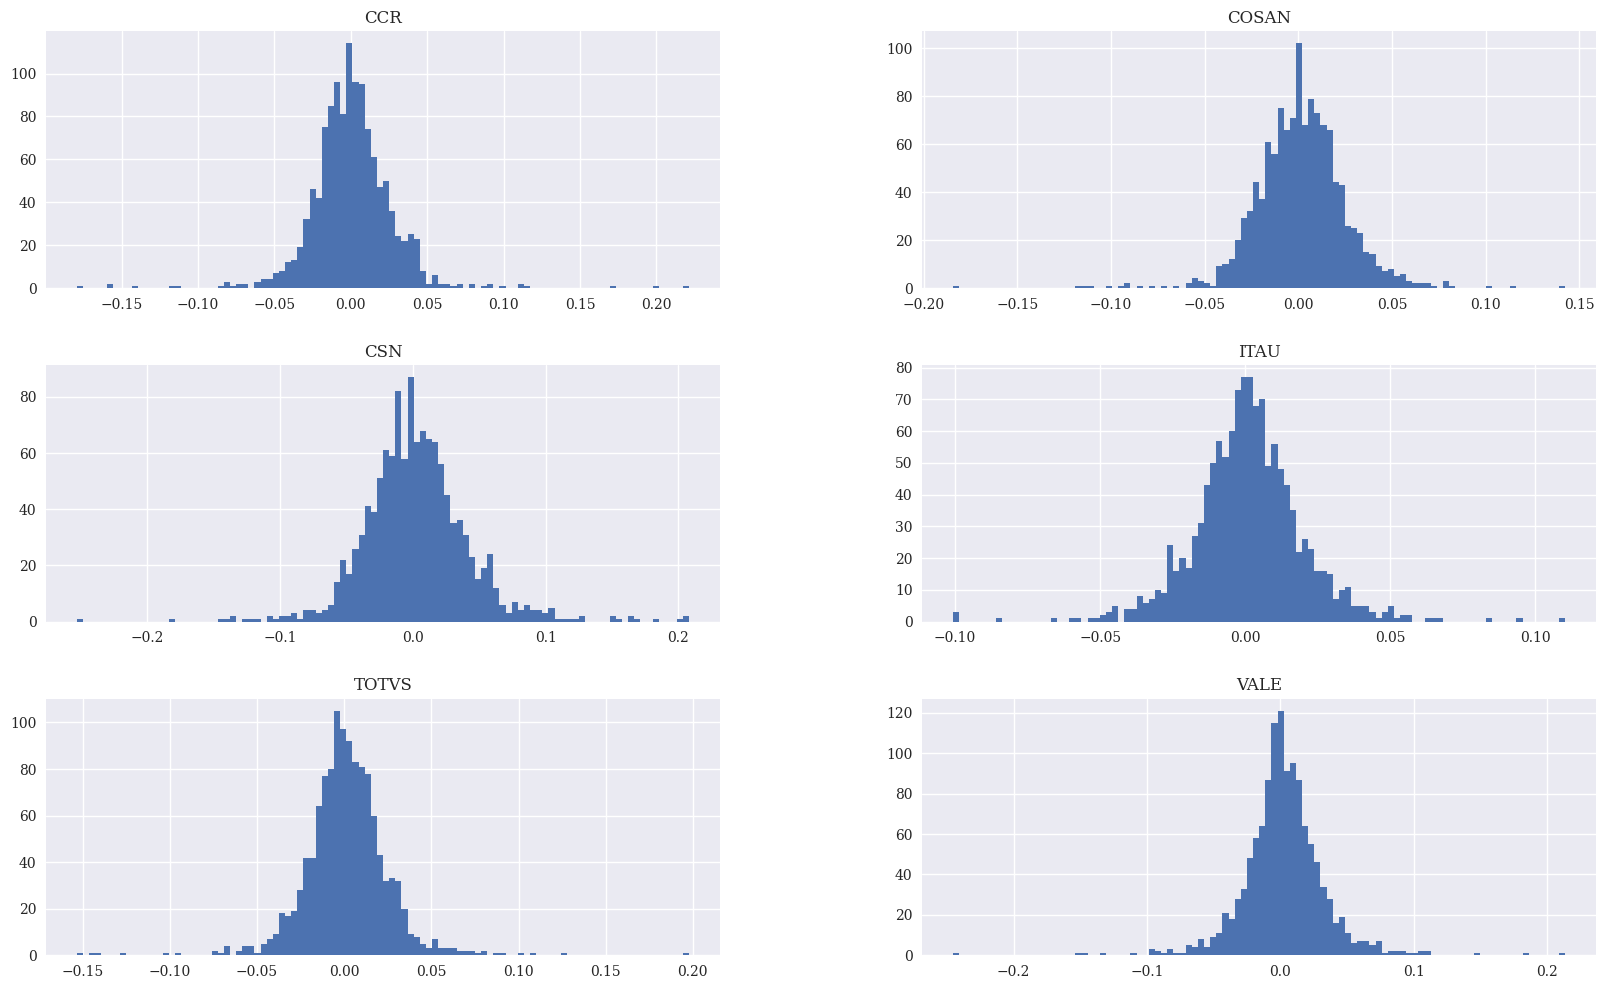

In [ ]:
# Histogramas

retornos.hist(bins=100,figsize=(20,12))

In [ ]:
# Estatística descritiva

# Estimar a Assimetria
  # Forma manual
desvios = retornos-retornos.mean()
Desvpad = retornos.std(ddof=0)
print('Assimetria calculada "na mão"\n')

Assimetria = ((desvios**3)/(Desvpad**3)).mean()
print(Assimetria)

  #Forma automática usando pacote scipy.stats as scs

print('\nAssimetria calculada pelo pacote scipy.stats\n')

dfa=[]
dfb=[]
data = [scs.skew(retornos)]

for i in range(len(rotulo)):
  dfa.append(data[0][i])
  dfb.append(rotulo[i])

ass = pd.DataFrame(columns=['Assimetria'],index=dfb,data=dfa)
ass


Assimetria calculada "na mão"

CCR      0.369372
COSAN   -0.358962
CSN      0.346541
ITAU    -0.029248
TOTVS    0.017874
VALE    -0.092395
dtype: float64

Assimetria calculada pelo pacote scipy.stats



,Assimetria
CCR,0.369372
COSAN,-0.358962
CSN,0.346541
ITAU,-0.029248
TOTVS,0.017874
VALE,-0.092395


In [ ]:
# Estimando assimetria e curtose de forma totalmente automática

stats = scs.describe(retornos)
Coluna= rotulo
Linhas= ['Min', 'Max', 'Média', 'Var', 'Desvpad', 'Assimetria', 'Curtose']
Min= stats[1][0]
Max= stats[1][1]
Média= stats[2]
Var= stats[3]
Desvpad= Var**(1/2)
Assimetria= stats[4]
Curtose= stats[5]

stats_descritiva= [Min, Max, Média, Var, Desvpad, Assimetria, Curtose]

df_descritivo = pd.DataFrame(data=stats_descritiva, index=Linhas, columns=Coluna)
df_descritivo


,CCR,COSAN,CSN,ITAU,TOTVS,VALE
Min,-0.179310,-0.184370,-0.252925,-0.100790,-0.153436,-0.245592
Max,0.221567,0.142592,0.208207,0.110330,0.197996,0.213578
Média,0.000627,0.001353,0.002644,0.000946,0.001186,0.002144
Var,0.000752,0.000588,0.001606,0.000360,0.000594,0.000927
Desvpad,0.027414,0.024238,0.040070,0.018981,0.024364,0.030451
Assimetria,0.369372,-0.358962,0.346541,-0.029248,0.017874,-0.092395
Curtose,11.075617,5.804824,4.502149,3.898584,8.440339,8.282823


In [ ]:
# Estimar a matriz de covariancia

matriz_cov = retornos.cov()
matriz_cov

,CCR,COSAN,CSN,ITAU,TOTVS,VALE
CCR,0.000752,0.000335,0.000454,0.000287,0.000265,0.000289
COSAN,0.000335,0.000588,0.000405,0.000234,0.000212,0.000267
CSN,0.000454,0.000405,0.001606,0.000358,0.000269,0.000804
ITAU,0.000287,0.000234,0.000358,0.000360,0.000154,0.000193
TOTVS,0.000265,0.000212,0.000269,0.000154,0.000594,0.000185
VALE,0.000289,0.000267,0.000804,0.000193,0.000185,0.000927


In [ ]:
### Carteira com 2 ativos de forma manual

## Definindo calculos

retorno_esp = retornos.mean()
retorno_esp
print('Retorno Esperado por Ação:')
print(retorno_esp)
var = retornos.var()
print('\n\nVariação por Ação:')
print(var)
volat = var**(1/2)
print('\n\nVolatilidade das Ações')
print(volat)




Retorno Esperado por Ação:
CCR      0.000627
COSAN    0.001353
CSN      0.002644
ITAU     0.000946
TOTVS    0.001186
VALE     0.002144
dtype: float64


Variação por Ação:
CCR      0.000752
COSAN    0.000588
CSN      0.001606
ITAU     0.000360
TOTVS    0.000594
VALE     0.000927
dtype: float64


Volatilidade das Ações
CCR      0.027414
COSAN    0.024238
CSN      0.040070
ITAU     0.018981
TOTVS    0.024364
VALE     0.030451
dtype: float64


In [ ]:
retornos.mean()

CCR      0.000627
COSAN    0.001353
CSN      0.002644
ITAU     0.000946
TOTVS    0.001186
VALE     0.002144
dtype: float64

In [ ]:
# Retornos Esperados (VALE x TOTVS)

retorno_esp_VALE = retorno_esp['VALE']
retorno_esp_TOTVS = retorno_esp['TOTVS']

# Volatilidade e Covariancia

volat_VALE = volat['VALE']
volat_TOTVS = volat['TOTVS']
cov_VALE_TOTVS = retornos['VALE'].cov(retornos['TOTVS'])

# Porcentagem de cada ativo na carteira

w_a = 0.7
w_b = 1 - w_a

# Retorno e Risco da Carteira

ret_port = w_a*retorno_esp_VALE + w_b*retorno_esp_TOTVS
volat_port = (w_a**2*volat_VALE**2 + w_b**2*volat_VALE**2 + 2*w_a*w_b*cov_VALE_TOTVS)**(1/2)

port = pd.DataFrame(data=[w_a,w_b,ret_port,volat_port], index=['VALE (%)','TOTVS (%)','Retorno','Risco'], columns=['Composição Carteira 2 Ações'])
port

,Composição Carteira 2 Ações
VALE (%),0.700000
TOTVS (%),0.300000
Retorno,0.001857
Risco,0.024813


In [ ]:
# Montar curva de risco X retorno

curva_risco = []
curva_ret = []
L=101

for w in np.linspace(1,0,L): #ir de 1 até 0 em L passos
  risc_port= (w**2*volat_VALE**2 + (1-w)**2*volat_TOTVS**2 + 2*w*(1-w)*cov_VALE_TOTVS)**(1/2)
  curva_risco.append(risc_port)

  ret_port= w*retorno_esp_VALE + (1-w)*retorno_esp_TOTVS
  curva_ret.append(ret_port)

d = {'Peso VALE':np.linspace(1,0,L), 'Peso  TOTVS':np.linspace(0,1,L), 'Risco':curva_risco, 'Retorno':curva_ret}
carteira = pd.DataFrame(d)

carteira



,Peso VALE,Peso TOTVS,Risco,Retorno
0,1.00,0.00,0.030451,0.002144
1,0.99,0.01,0.030209,0.002135
2,0.98,0.02,0.029968,0.002125
3,0.97,0.03,0.029729,0.002115
4,0.96,0.04,0.029492,0.002106
...,...,...,...,...
96,0.04,0.96,0.023723,0.001224
97,0.03,0.97,0.023878,0.001215
98,0.02,0.98,0.024036,0.001205
99,0.01,0.99,0.024199,0.001196


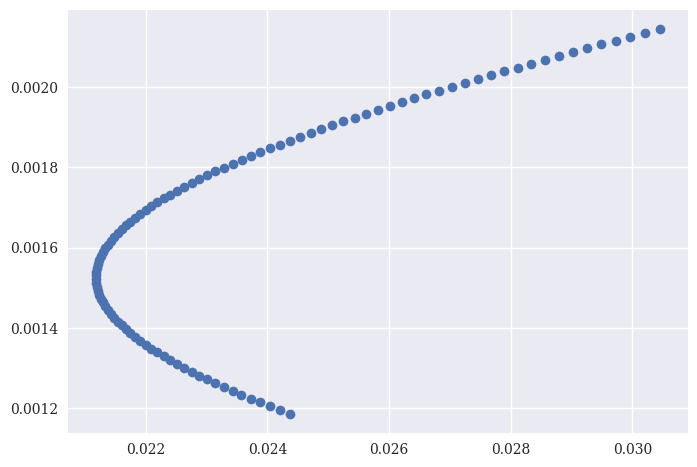

In [ ]:
# Plotar o gráfico

plt.plot(curva_risco, curva_ret,"o")

    Peso VALE  Peso  TOTVS     Risco   Retorno
65       0.35         0.65  0.021183  0.001521
Risco (%):2.12
Retorno esperado (%):0.15
Composição VALE:0.35
Composição TOTVS:0.65


Text(0, 0.5, 'Retorno')

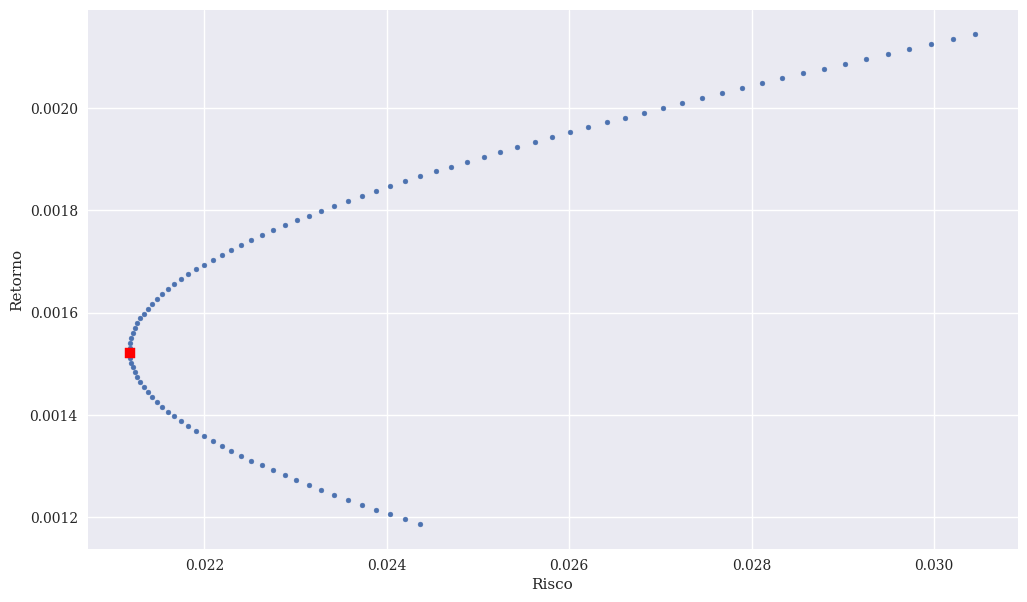

In [ ]:
# Buscando a composção de menor risco (Forma manual)

min_risc=carteira[carteira['Risco']==carteira['Risco'].min()]

print(min_risc)
print(f'Risco (%):{min_risc.iloc[0,2]*100:,.2f}')
print(f'Retorno esperado (%):{min_risc.iloc[0,3]*100:,.2f}')
print(f'Composição VALE:{min_risc.iloc[0,0]:,.2f}')
print(f'Composição TOTVS:{min_risc.iloc[0,1]:,.2f}')

plt.figure(figsize=(12,7))
plt.scatter(carteira['Risco'],carteira['Retorno'],marker='.')
plt.scatter(min_risc['Risco'],min_risc['Retorno'],marker=',',color='r')
plt.xlabel('Risco')
plt.ylabel('Retorno')

In [ ]:
# Estimar o indice de sharpe

risk_free = ((0.08+1)**(1/252))-1 #Taxa livre de risco convertida ao dia

sharpe = ((carteira['Retorno'] - risk_free)/carteira['Risco'])

d = {'Peso VALE':np.linspace(1,0,L), 'Peso  TOTVS':np.linspace(0,1,L), 'Risco':curva_risco, 'Retorno':curva_ret,'Sharpe':sharpe}
carteira_sharpe = pd.DataFrame(d)
carteira_sharpe

,Peso VALE,Peso TOTVS,Risco,Retorno,Sharpe
0,1.00,0.00,0.030451,0.002144,0.060381
1,0.99,0.01,0.030209,0.002135,0.060549
2,0.98,0.02,0.029968,0.002125,0.060716
3,0.97,0.03,0.029729,0.002115,0.060881
4,0.96,0.04,0.029492,0.002106,0.061046
...,...,...,...,...,...
96,0.04,0.96,0.023723,0.001224,0.038735
97,0.03,0.97,0.023878,0.001215,0.038083
98,0.02,0.98,0.024036,0.001205,0.037433
99,0.01,0.99,0.024199,0.001196,0.036786


    Peso VALE  Peso  TOTVS     Risco   Retorno    Sharpe
34       0.66         0.34  0.023574  0.001818  0.064179


Text(0, 0.5, 'Retorno')

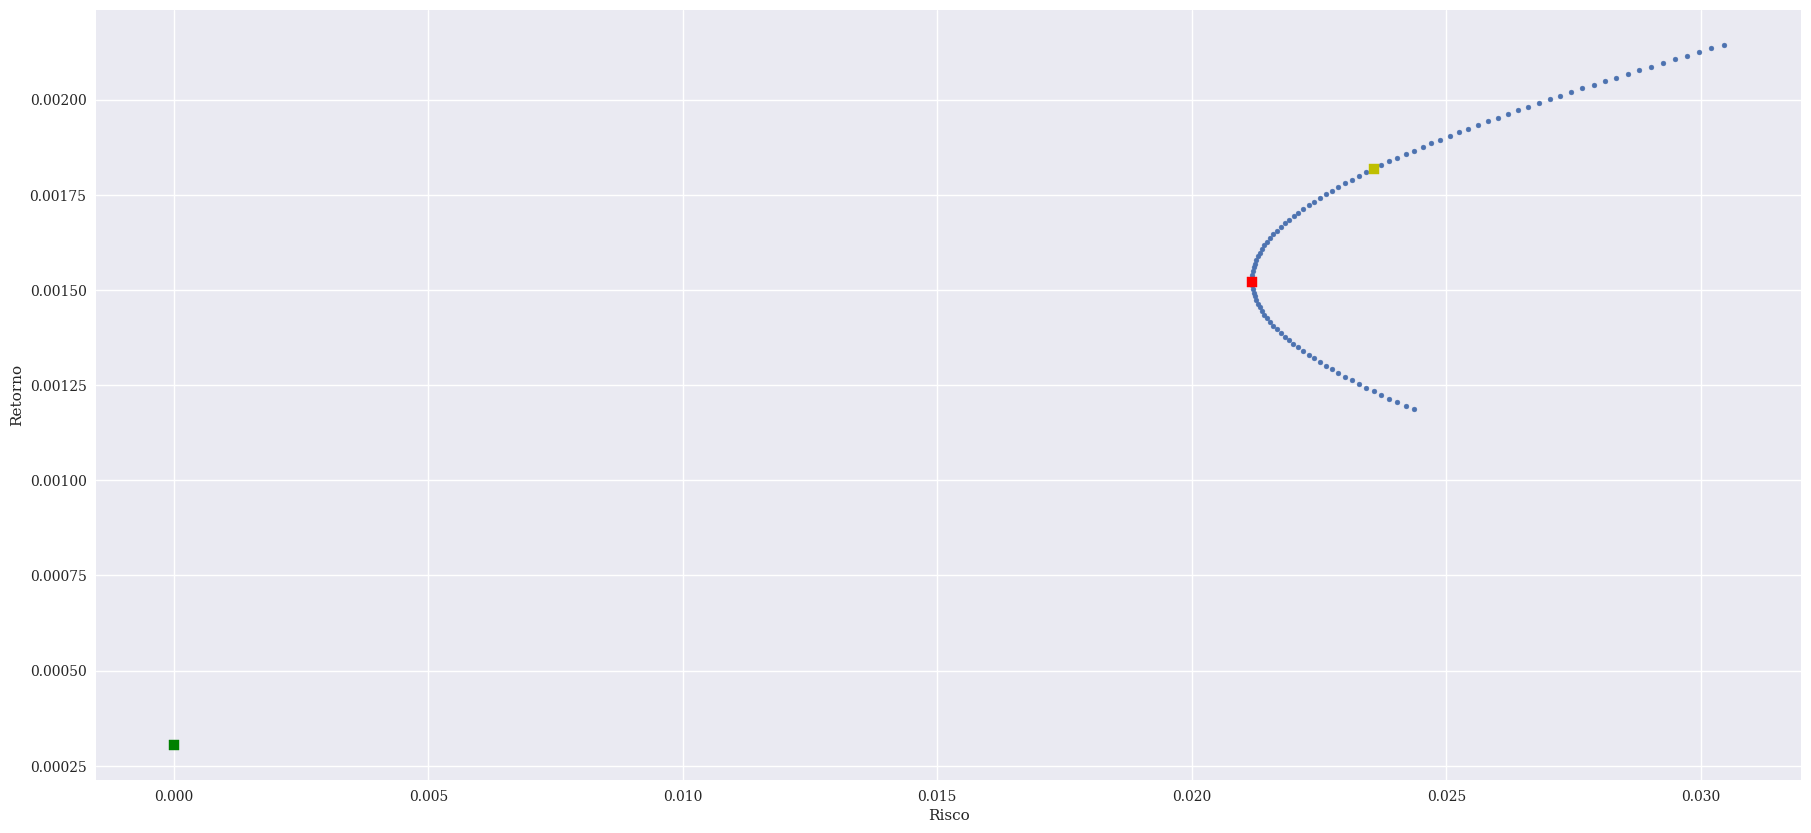

In [ ]:
## Carteira com maior Sharpe

max_sharp = carteira_sharpe[carteira_sharpe['Sharpe']==carteira_sharpe['Sharpe'].max()]
print(max_sharp)

plt.figure(figsize=(22,10))
plt.scatter(carteira_sharpe['Risco'],carteira_sharpe['Retorno'],marker='.')
plt.scatter(min_risc['Risco'],min_risc['Retorno'],marker=',',color='r')
plt.scatter(max_sharp['Risco'],max_sharp['Retorno'],marker=',',color='y')
plt.scatter(0,risk_free,marker=',',color='g')
plt.xlabel('Risco')
plt.ylabel('Retorno')

In [ ]:
# Perfil do investidor
## Calcular a Capital Allocation Line - CAL

cal_x= []
cal_y= []

utilidade= []

a = 20 #nível de aversão ao risco

for retorno_esp in np.linspace(risk_free, max(carteira['Retorno']), 1000):
  desv_pad = (retorno_esp-risk_free)/((max_sharp['Retorno']-risk_free)/max_sharp['Risco'])
  u = retorno_esp-0.5*a*(desv_pad**2)
  cal_x.append(desv_pad)
  cal_y.append(retorno_esp)
  utilidade.append(u)

data2= {'Utilizadade':utilidade,'Retorno da Reta':cal_y,'Risco da Reta':cal_x}
cal_data = pd.DataFrame(data2)
cal_data

,Utilizadade,Retorno da Reta,Risco da Reta
0,34 0.000305 dtype: float64,0.000305,34 0.0 dtype: float64
1,34 0.000307 dtype: float64,0.000307,34 0.000029 dtype: float64
2,34 0.000309 dtype: float64,0.000309,34 0.000057 dtype: float64
3,34 0.000311 dtype: float64,0.000311,34 0.000086 dtype: float64
4,34 0.000313 dtype: float64,0.000313,34 0.000115 dtype: float64
...,...,...,...
995,34 -0.006005 dtype: float64,0.002137,34 0.028535 dtype: float64
996,34 -0.00602 dtype: float64,0.002139,34 0.028563 dtype: float64
997,34 -0.006035 dtype: float64,0.002140,34 0.028592 dtype: float64
998,34 -0.006049 dtype: float64,0.002142,34 0.028621 dtype: float64


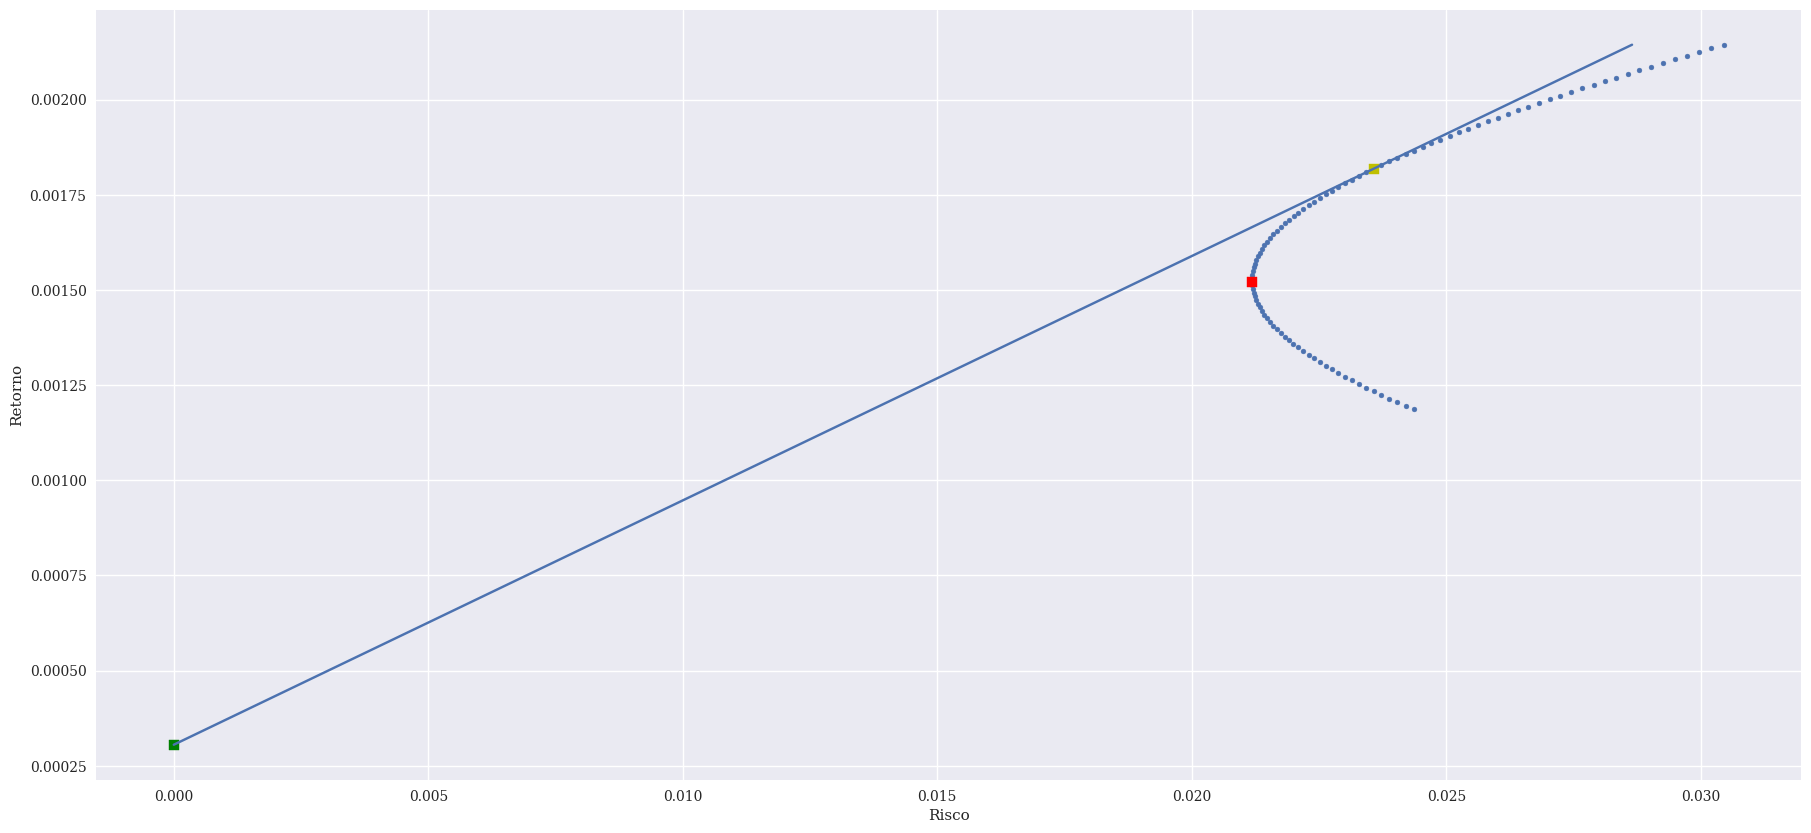

In [ ]:
# PLotar Gráfico

plt.figure(figsize=(22,10))
plt.scatter(carteira_sharpe['Risco'],carteira_sharpe['Retorno'],marker='.')
plt.scatter(min_risc['Risco'],min_risc['Retorno'],marker=',',color='r')
plt.scatter(max_sharp['Risco'],max_sharp['Retorno'],marker=',',color='y')
plt.scatter(0,risk_free,marker=',',color='g')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.plot(cal_x,cal_y)

In [ ]:
# Estimar a carteira ótima completa

wp= (max_sharp['Retorno']-risk_free)/(a*max_sharp['Risco']**2) #peso da carteira ótima
wp #Quanto maior o a, menor o wp

ret_oc = wp*max_sharp['Retorno']+(1-wp)*risk_free
ret_oc

vol_oc = wp*max_sharp['Risco']
vol_oc

ot = {'Peso Risco':wp,'Peso Rf':(1-wp),'Risco':vol_oc,'Retorno':ret_oc}
otima = pd.DataFrame(ot)
otima

,Peso Risco,Peso Rf,Risco,Retorno
34,0.136124,0.863876,0.003209,0.000511


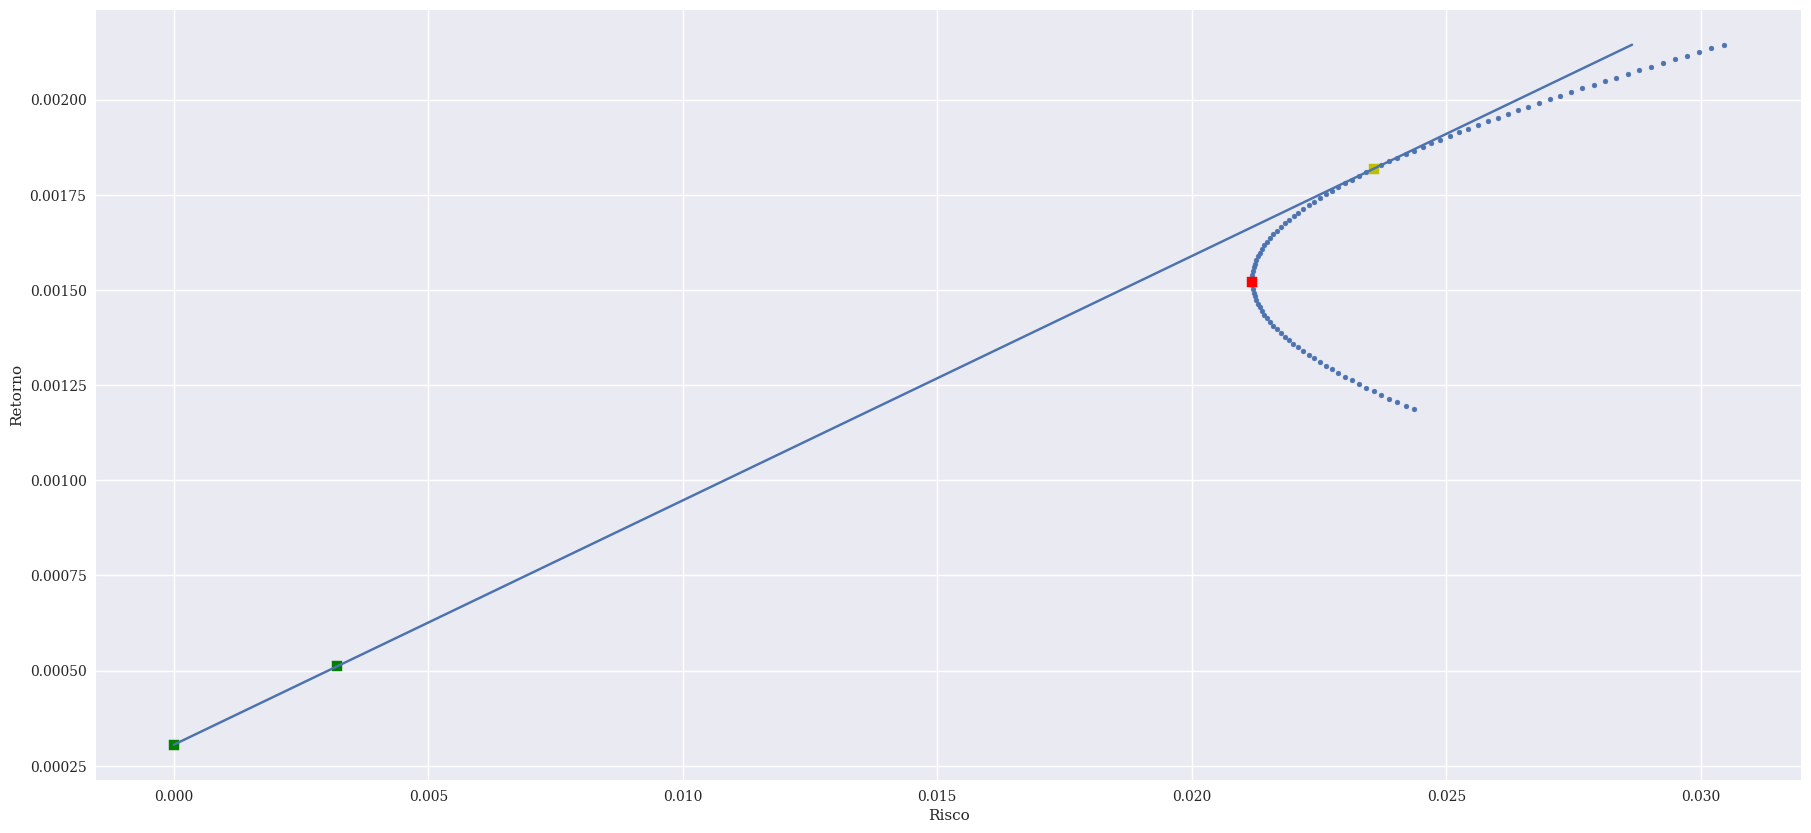

In [ ]:
## PLotar o gráfico

plt.figure(figsize=(22,10))
plt.scatter(carteira_sharpe['Risco'],carteira_sharpe['Retorno'],marker='.')
plt.scatter(min_risc['Risco'],min_risc['Retorno'],marker=',',color='r')
plt.scatter(max_sharp['Risco'],max_sharp['Retorno'],marker=',',color='y')
plt.scatter(0,risk_free,marker=',',color='g')
plt.scatter(otima['Risco'],otima['Retorno'],marker=',',color='g')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.plot(cal_x,cal_y)

In [ ]:
## Carteira com mais ativos

p_ret=[] #conjunto vazio de retorno
p_vol=[] #conjunto vazio de volatilidade
p_pesos=[] #conjunto vazio de pesos

noa = len(retornos.columns) #número de ativos
nop = 20000 #número de carteiras a serem simuladas

for portfolios in range(nop):
  p = np.random.random(noa)
  pesos = p/np.sum(p)
  p_pesos.append(pesos)
  ret = np.dot((pesos), retornos.mean())
  p_ret.append(ret)
  var = np.dot(pesos.T, np.dot(np.cov(retornos.T), pesos))
  #variancia = matriz_cov.mul(pesos,axis=0).mul(pesos,axis=1).sum()
  #variancia = np.dot(pesos.T, np.dot(matriz_cov, pesos))
  desvp = np.sqrt(var)
  p_vol.append(desvp)



p_ret=np.array(p_ret)
p_vol=np.array(p_vol)



dados={'Retorno':p_ret,'Risco':p_vol}

portfolios = pd.DataFrame(dados)

portfolios

,Retorno,Risco
0,0.001653,0.022198
1,0.001322,0.019266
2,0.001424,0.019505
3,0.001851,0.023850
4,0.001296,0.018700
...,...,...
19995,0.001668,0.022097
19996,0.001635,0.021346
19997,0.001636,0.021416
19998,0.001374,0.019985


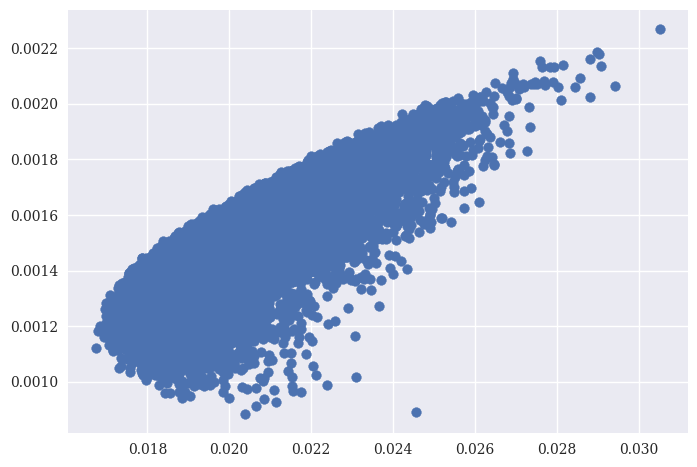

In [ ]:
# Plotar Gráfico

plt.scatter(portfolios['Risco'],portfolios['Retorno'])

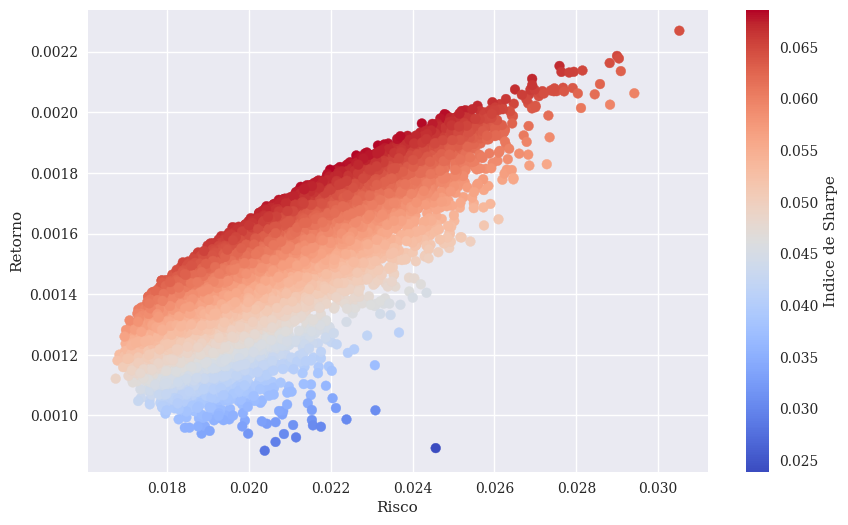

In [ ]:
## Gráfico da fronteira eficiente com indice de Sharpe

plt.figure(figsize=(10,6))
plt.scatter(p_vol,p_ret,c=(p_ret-risk_free)/p_vol,marker='o',cmap='coolwarm')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de Sharpe')

In [ ]:
# Encontrar a carteira de menor risco

min_risk_port = portfolios[portfolios['Risco']==portfolios['Risco'].min()]
n = min_risk_port.index[0]


# rotulo = ['CCR', 'COSAN', 'CSN', 'ITAU', 'TOTVS', 'VALE']

df={rotulo[0]:p_pesos[n][0],rotulo[1]:p_pesos[n][1],rotulo[2]:p_pesos[n][2],rotulo[3]:p_pesos[n][3],
    rotulo[4]:p_pesos[n][4],rotulo[5]:p_pesos[n][5],'Retorno':min_risk_port['Retorno'],'Risco':min_risk_port['Risco']}

dados_min = pd.DataFrame(df)

dados_min


,CCR,COSAN,CSN,ITAU,TOTVS,VALE,Retorno,Risco
18569,0.068844,0.128174,0.002495,0.482918,0.250148,0.067421,0.001121,0.016749


In [ ]:
#Outra forma de fazer!!
df1=[]
df2=[]

for i in range(len(rotulo)):
  dados1 = rotulo[i]
  df1.append(dados1)
  dados2 = p_pesos[n][i]
  df2.append(dados2)
df1.append('Risco')
df1.append('Retorno')
df2.append(min_risk_port['Risco'].values[0])
df2.append(min_risk_port['Retorno'].values[0])

df = pd.DataFrame(data=df2,index=df1,columns=['Composição da Carteira'])
df



,Composição da Carteira
CCR,0.068844
COSAN,0.128174
CSN,0.002495
ITAU,0.482918
TOTVS,0.250148
VALE,0.067421
Risco,0.016749
Retorno,0.001121


In [ ]:
#Funções para Estimar risco X retorno de um potfólio

def port_ret(pesos):
  return np.sum(retornos.mean()*pesos)

def port_vol(pesos):
  return math.sqrt(np.dot(pesos.T,np.dot(matriz_cov,pesos)))

In [ ]:
# ESTIMAR A CARTEIRA DE MENOR RISCO GLOBAL POR OTIMIZAÇÃO

r1 =  ({'type':'eq','fun': lambda  x: np.sum(x)-1})
bnds=tuple((0,1)for x in range(len(rotulo)))  #bounds
pesos_i = np.array((len(rotulo)*[1/(len(rotulo)),]))

###OTIMIZAÇÃO DA CARTEIRA

otm_vol=sco.minimize(port_vol,pesos_i,method='SLSQP',bounds=bnds,constraints=r1)

#Pesos otimizados
otm_vol['x'].round(5)

#retorno da carteira de menor risco  global
port_ret(otm_vol['x'])

#Risco da carteira de menor risco global
port_vol(otm_vol['x'])

0.016607004414360676

In [ ]:
### Estimar Máximo Sharpe

SR = ((p_ret-risk_free)/p_vol)
SR.max()


0.06859635020071796

In [ ]:
## Estimar Carteira de sharpe máximo

#Func. Sharpe

def min_func_sharpe(pesos):
  return -(port_ret(pesos)-risk_free)/port_vol(pesos)

#Otimização do sharpe

otm_s = sco.minimize(min_func_sharpe,pesos_i,method='SLSQP',bounds=bnds, constraints=r1)

# Pesos otimizados
otm_s['x'].round(3)

# Retorno da Carteira

port_ret(otm_s['x'])

# Risco da Carteira

port_vol(otm_s['x'])

# Máximo Sharpe

(port_ret(otm_s['x'])-risk_free)/port_vol(otm_s['x'])



0.06892691774713029

In [ ]:
## ESTIMAÇÃO DA FRONTEIRA EFICIENTE

cons = ({'type':'eq','fun':lambda x: port_ret(x) - tret},{'type':'eq','fun':lambda x: np.sum(x)-1}) #restrições
bnds=tuple((0,1) for x in pesos)
t_rets = np.linspace(p_ret.min(),p_ret.max(),50) #retornos da minha fronteira
t_vols=[]

for tret in t_rets:
  res = sco.minimize(port_vol, pesos_i, method='SLSQP', bounds=bnds, constraints=cons) #função de minimização
  t_vols.append(res['fun'])

t_vols = np.array(t_vols)
t_vols



array([0.01829942, 0.01785422, 0.01751283, 0.01727125, 0.01708595,
       0.01695014, 0.01684144, 0.01675098, 0.01668095, 0.01662966,
       0.01660168, 0.01660246, 0.01663241, 0.0166914 , 0.01677913,
       0.01689515, 0.01703895, 0.01720966, 0.01740629, 0.0176266 ,
       0.01785844, 0.01810456, 0.01836364, 0.01863603, 0.01892109,
       0.01921833, 0.01952726, 0.01984734, 0.02017809, 0.02051897,
       0.0208695 , 0.02122921, 0.02159762, 0.0219743 , 0.02235885,
       0.02275113, 0.02315709, 0.02358557, 0.02402038, 0.02447388,
       0.02494056, 0.0254197 , 0.02591059, 0.02641259, 0.02692506,
       0.02744763, 0.02797913, 0.02851965, 0.02906847, 0.02962516])

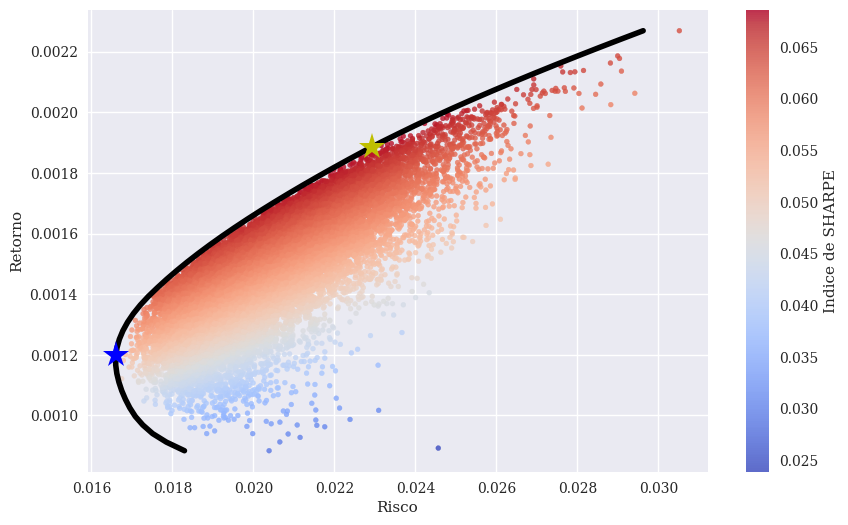

In [ ]:
# Gráfico da Fronteira Eficiente

plt.figure(figsize=(10,6))
plt.scatter(p_vol,p_ret, c=(p_ret-risk_free)/p_vol, marker='.',alpha=0.8,cmap='coolwarm')
plt.plot(t_vols, t_rets, 'black',lw=4.0) # linha da fronteira eficiente
plt.plot(port_vol(otm_s['x']), port_ret(otm_s['x']),'y*',markersize=20.0) #indicação do maximo sharpe
plt.plot(port_vol(otm_vol['x']),port_ret(otm_vol['x']), 'b*', markersize=20.0) #indicação do menor risco
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de SHARPE')

In [ ]:
## LINHA DE ALOCAÇÃO DE CAPITAL

eixo_x=[]
eixo_y=[]
utility=[]
a = 10 #Nível de aversão ao risco

for retorno_esp in np.linspace(risk_free,max(t_rets),20):
  sd = (retorno_esp- risk_free)/((port_ret(otm_s['x']) - risk_free)/port_vol(otm_s['x'])) #volatilidade
  u = retorno_esp - 0.5*a*(sd**2) #Calculo da utilidado, sendo ele o 0.5 * a * desvpad
  eixo_x.append(sd)
  eixo_y.append(retorno_esp)
  utility.append(u)

data_aloc = {'Utilidade': utility, 'Retorno':eixo_y, 'Risco':eixo_x}
aloc_cap = pd.DataFrame(data_aloc)

aloc_cap

,Utilidade,Retorno,Risco
0,0.000305,0.000305,0.000000
1,0.000398,0.000409,0.001499
2,0.000467,0.000512,0.002999
3,0.000514,0.000615,0.004498
4,0.000539,0.000719,0.005997
5,0.000541,0.000822,0.007497
6,0.000521,0.000926,0.008996
7,0.000478,0.001029,0.010495
8,0.000413,0.001132,0.011995
9,0.000325,0.001236,0.013494


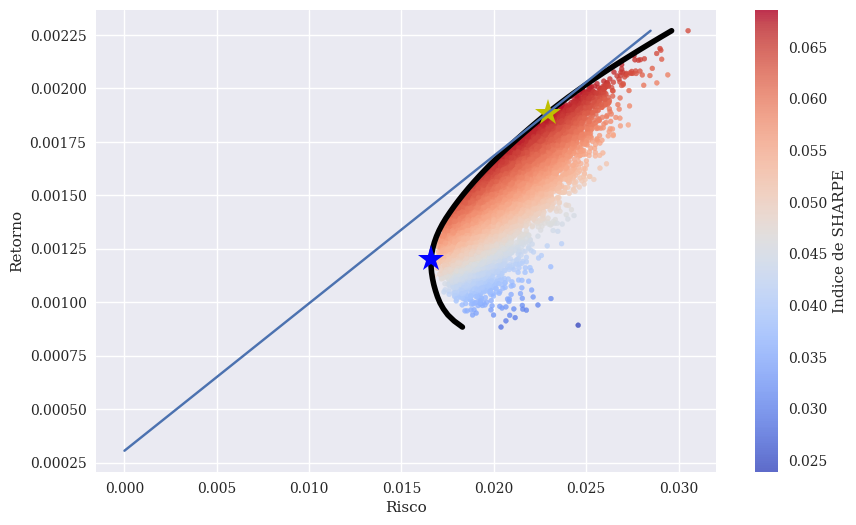

In [ ]:
## GRÁFICO DA FRONTEIRA EFICIENTE COM ALOCAÇÃO DE CAPITAL

plt.figure(figsize=(10,6))
plt.scatter(p_vol,p_ret, c=(p_ret-risk_free)/p_vol, marker='.',alpha=0.8,cmap='coolwarm')
plt.plot(t_vols, t_rets, 'black',lw=4.0) # linha da fronteira eficiente
plt.plot(port_vol(otm_s['x']), port_ret(otm_s['x']),'y*',markersize=20.0) #indicação do maximo sharpe
plt.plot(port_vol(otm_vol['x']),port_ret(otm_vol['x']), 'b*', markersize=20.0) #indicação do menor risco
plt.plot(eixo_x,eixo_y)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de SHARPE')

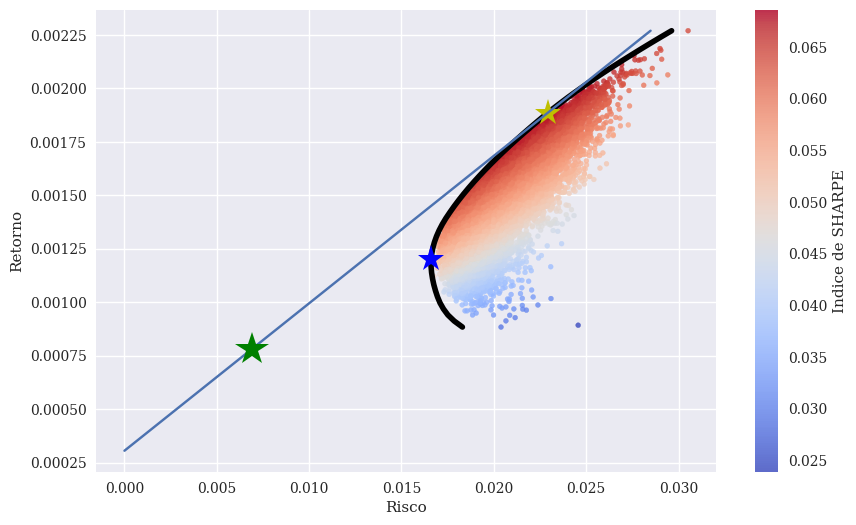

In [ ]:
### ESTIMAR CARTEIRA ÓTIMA COMPLETA

wp = (port_ret(otm_s['x'])-risk_free)/(a*port_vol(otm_s['x'])**2)

r_oc = wp*port_ret(otm_s['x'])+(1-wp)*risk_free
v_oc = wp*port_vol(otm_s['x'])

##GRAFICO
plt.figure(figsize=(10,6))
plt.scatter(p_vol,p_ret, c=(p_ret-risk_free)/p_vol, marker='.',alpha=0.8,cmap='coolwarm')
plt.plot(t_vols, t_rets, 'black',lw=4.0) # linha da fronteira eficiente
plt.plot(port_vol(otm_s['x']), port_ret(otm_s['x']),'y*',markersize=20.0) #indicação do maximo sharpe
plt.plot(port_vol(otm_vol['x']),port_ret(otm_vol['x']), 'b*', markersize=20.0) #indicação do menor risco
plt.plot(eixo_x,eixo_y)
plt.plot(v_oc,r_oc,'g*',markersize=25.0)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Indice de SHARPE')